In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,LSTM

In [4]:
from keras.optimizers import RMSprop

In [5]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (40, 40, 3)))
model.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
#model.add(Dropout(.01))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (40, 40, 3)))
model.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
#model.add(Dropout(.01))

model.add(Conv2D(filters = 96, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (40, 40, 3)))
model.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))


model.add(Flatten())


model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.01)) 

model.add(Dense(units = 50, activation = 'softmax'))

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 96)         0

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory('D:/education/images for bengali char/Dataset/Dataset/Train', target_size = (40, 40), 
                                                 batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('D:/education/images for bengali char/Dataset/Dataset/Test', target_size = (40, 40), 
                                                 batch_size = 32, class_mode = 'categorical')

Found 12000 images belonging to 50 classes.
Found 2997 images belonging to 50 classes.


In [9]:
steps_per_epoch = training_set.samples // training_set.batch_size
validation_steps = test_set.samples // test_set.batch_size

In [10]:
from keras.callbacks import ReduceLROnPlateau

In [11]:
learning_rate_reduction = ReduceLROnPlateau( 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
hist1=model.fit(training_set,
          steps_per_epoch=steps_per_epoch,
          epochs=50,
          validation_data=test_set,
          validation_steps=validation_steps,
          callbacks=[learning_rate_reduction])

Epoch 1/50
375/375 [==============================] - 31s 82ms/step - loss: 2.0278 - accuracy: 0.4538 - val_loss: 0.8163 - val_accuracy: 0.7665 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - 32s 85ms/step - loss: 0.7227 - accuracy: 0.7920 - val_loss: 0.5208 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 3/50
375/375 [==============================] - 34s 91ms/step - loss: 0.4483 - accuracy: 0.8654 - val_loss: 0.3682 - val_accuracy: 0.8935 - lr: 0.0010
Epoch 4/50
375/375 [==============================] - 36s 95ms/step - loss: 0.3122 - accuracy: 0.9068 - val_loss: 0.3108 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 5/50
375/375 [==============================] - 36s 95ms/step - loss: 0.2383 - accuracy: 0.9292 - val_loss: 0.2494 - val_accuracy: 0.9321 - lr: 0.0010
Epoch 6/50
375/375 [==============================] - 34s 91ms/step - loss: 0.1931 - accuracy: 0.9408 - val_loss: 0.3098 - val_accuracy: 0.9147 - lr: 0.0010
Epoch 7/50
375/375 [==============================] - 33s 

In [13]:
WORKING_DIR = 'D:/education/images for bengali char/model'

In [14]:
model.save(WORKING_DIR+'/best_model_17_8_23.h5')

In [15]:
import pandas as pd
history_df1 = pd.DataFrame(hist1.history)

In [16]:
history_df1.to_excel(WORKING_DIR+'training_history.xlsx', index=False)

In [17]:
from tabulate import tabulate
print(tabulate(history_df1, headers='keys', tablefmt='psql'))

+----+------------+------------+------------+----------------+------------+
|    |       loss |   accuracy |   val_loss |   val_accuracy |         lr |
|----+------------+------------+------------+----------------+------------|
|  0 | 2.02781    |   0.45375  |   0.816284 |       0.766465 | 0.001      |
|  1 | 0.722732   |   0.792    |   0.520753 |       0.854503 | 0.001      |
|  2 | 0.448282   |   0.865417 |   0.368221 |       0.893481 | 0.001      |
|  3 | 0.312161   |   0.90675  |   0.310835 |       0.912298 | 0.001      |
|  4 | 0.238343   |   0.929167 |   0.249422 |       0.932124 | 0.001      |
|  5 | 0.193125   |   0.94075  |   0.309834 |       0.914651 | 0.001      |
|  6 | 0.145006   |   0.956083 |   0.250615 |       0.935148 | 0.001      |
|  7 | 0.13095    |   0.960583 |   0.293898 |       0.927419 | 0.001      |
|  8 | 0.0717219  |   0.977583 |   0.256346 |       0.942876 | 0.0005     |
|  9 | 0.0564009  |   0.983    |   0.236694 |       0.953293 | 0.0005     |
| 10 | 0.048

In [18]:
filename = 'D:/education/images for bengali char/model/history_table3.csv'
history_df1.to_csv(filename, index=False)

print(f"The table has been saved as {filename}.")

The table has been saved as D:/education/images for bengali char/model/history_table3.csv.


In [19]:
import tensorflow as tf
from tensorflow.keras.utils import model_to_dot
from PIL import Image
import pydotplus
import matplotlib.pyplot as plt

In [20]:
history=hist1

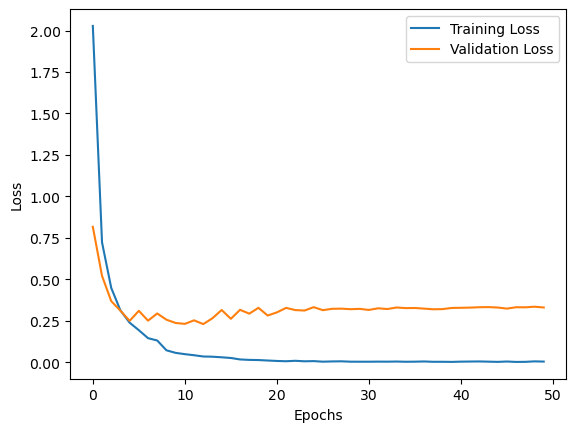

In [21]:
#plt.figure(figsize=(12, 4))
#plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

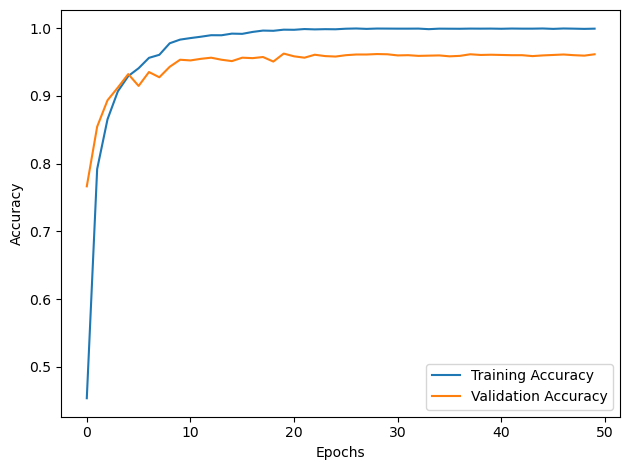

In [22]:
#plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

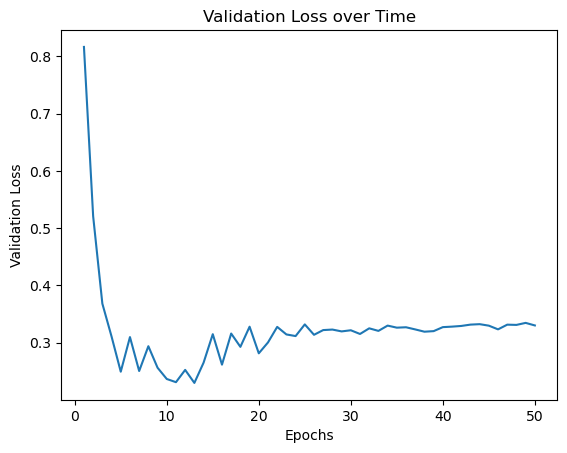

In [23]:
# Extract the validation loss from the history
val_loss = history.history['val_loss']

# Plot the validation loss over epochs
plt.plot(range(1, len(val_loss) + 1), val_loss)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Time')
plt.show()

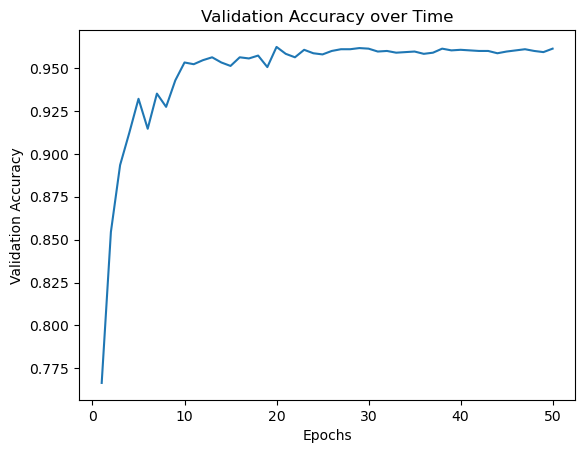

In [24]:
# Extract the validation accuracy from the history
val_accuracy = history.history['val_accuracy']

# Plot the validation accuracy over epochs
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Time')
plt.show()

In [25]:

train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy (if using validation_split)

# Print or plot the accuracy values
print("Training Accuracy:", max(train_accuracy))
print("Validation Accuracy:", max(val_accuracy))



Training Accuracy: 0.9994166493415833
Validation Accuracy: 0.9623655676841736


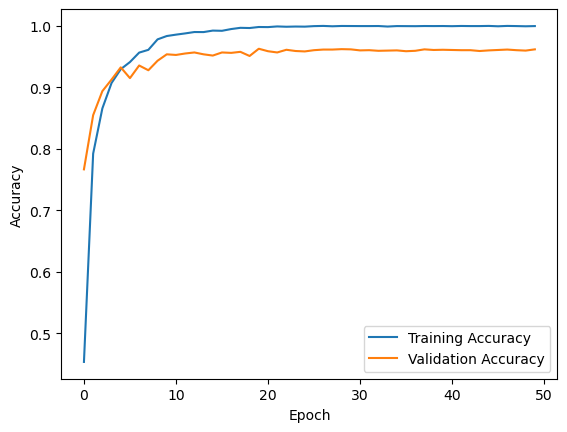

In [26]:
import matplotlib.pyplot as plt

plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

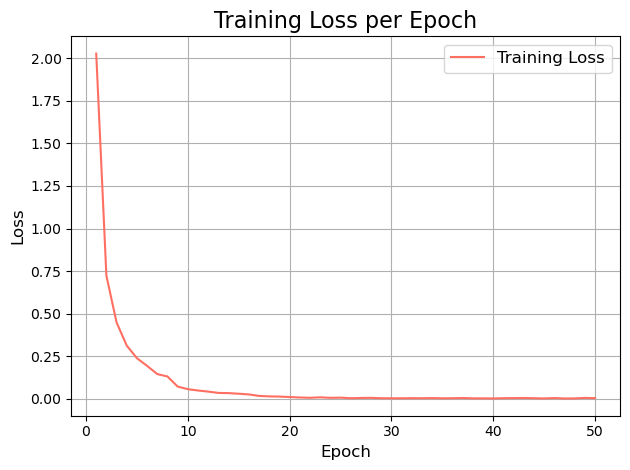

In [27]:
# Retrieve training loss history
training_loss = history.history['loss']

# Plot the training loss with an attractive color
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, color='#FF6F61', label='Training Loss')
plt.title('Training Loss per Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save the image
plt.savefig('training_loss_plot.png')

# Show the plot
plt.show()









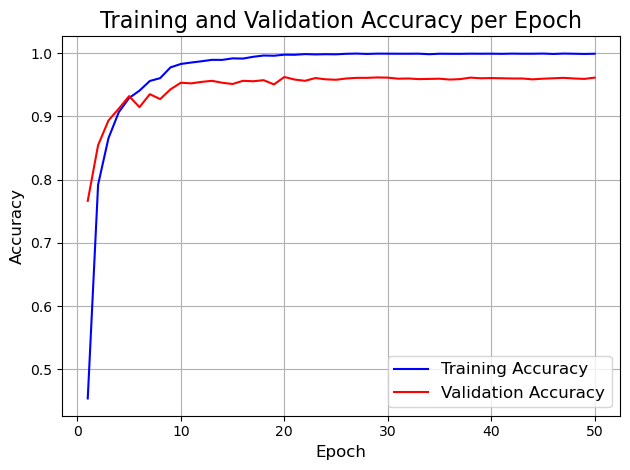

In [28]:
# Retrieve training and validation accuracy history
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
epochs = range(1, len(training_acc) + 1)
plt.plot(epochs, training_acc, color='blue', label='Training Accuracy')
plt.plot(epochs, validation_acc, color='red', label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save the image
plt.savefig('accuracy_plot.png')

# Show the plot
plt.show()

In [29]:
import pandas as pd
# Create an empty list to store layer information
layer_info = []

# Iterate through each layer in the model
for layer in model.layers:
    layer_name = layer.name
    output_shape = layer.output_shape[1:]  # Exclude batch size
    filter_size = '-'
    stride_size = '-'
    dropout = '-'

    # If the layer is a convolutional layer, extract filter size and stride size
    if 'conv' in layer_name.lower():
        filter_size = layer.kernel_size
        stride_size = layer.strides

    # If the layer has dropout, extract the dropout rate
    if 'dropout' in layer_name.lower():
        dropout = layer.rate

    # Add the layer information to the list
    layer_info.append([layer_name, output_shape, filter_size, stride_size, dropout])

# Create a Pandas DataFrame from the layer information list
df = pd.DataFrame(layer_info, columns=['Layer', 'Output Size', 'Filter Size', 'Stride Size', 'Dropout'])

# Display the table
print(df)


             Layer   Output Size Filter Size Stride Size Dropout
0           conv2d  (40, 40, 32)      (3, 3)      (1, 1)       -
1    max_pooling2d  (20, 20, 32)           -           -       -
2         conv2d_1  (20, 20, 64)      (3, 3)      (1, 1)       -
3  max_pooling2d_1  (10, 10, 64)           -           -       -
4         conv2d_2  (10, 10, 96)      (3, 3)      (1, 1)       -
5  max_pooling2d_2    (5, 5, 96)           -           -       -
6          flatten       (2400,)           -           -       -
7            dense        (512,)           -           -       -
8          dropout        (512,)           -           -    0.01
9          dense_1         (50,)           -           -       -


1/1 [==============================] - 0s 119ms/step


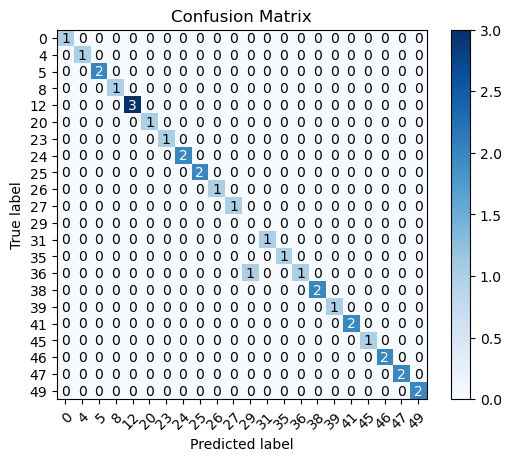

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Get the test data and labels from the ImageDataGenerator
X_test = test_set[0][0]
y_test = test_set[0][1]

# Perform predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Get the class labels
classes = unique_labels(y_true_classes, y_pred_classes)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.savefig('Confusion Matrix.jpg', format='jpeg')
plt.show()


In [31]:
import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *
from keras.preprocessing import image
import os

In [32]:
def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'D:/education/images for bengali char/image.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 30)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 30)
        
    root = Tk()
    
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()

In [33]:
def determine_character(res):
    if res == 0:
        print('prediction : অ')
    elif res == 1:
        print('prediction : আ')
    elif res == 2:
        print('prediction : ই')
    elif res == 3:
        print('prediction : ঈ')
    elif res == 4:
        print('prediction : উ')
    elif res == 5:
        print('prediction : ঊ')
    elif res == 6:
        print('prediction : ঋ')
    elif res == 7:
        print('prediction : এ')
    elif res == 8:
        print('prediction : ঐ')
    elif res == 9:
        print('prediction : ও')
    elif res == 10:
        print('prediction : ঔ')
    elif res == 11:
        print('prediction : ক')
    elif res == 12:
        print('prediction : খ')
    elif res == 13:
        print('prediction : গ')
    elif res == 14:
        print('prediction : ঘ')
    elif res == 15:
        print('prediction : ঙ')
    elif res == 16:
        print('prediction : চ')
    elif res == 17:
        print('prediction : ছ')
    elif res == 18:
        print('prediction : জ')
    elif res == 19:
        print('prediction : ঝ')
    elif res == 20:
        print('prediction : ঞ')
    elif res == 21:
        print('prediction : ট')
    elif res == 22:
        print('prediction : ঠ')
    elif res == 23:
        print('prediction : ড')
    elif res == 24:
        print('prediction : ঢ')
    elif res == 25:
        print('prediction : ণ')
    elif res == 26:
        print('prediction : ত')
    elif res == 27:
        print('prediction : থ')
    elif res == 28:
        print('prediction : দ')
    elif res == 29:
        print('prediction : ধ')
    elif res == 30:
        print('prediction : ন')
    elif res == 31:
        print('prediction : প')
    elif res == 32:
        print('prediction : ফ')
    elif res == 33:
        print('prediction : ব')
    elif res == 34:
        print('prediction : ভ')
    elif res == 35:
        print('prediction : ম')
    elif res == 36:
        print('prediction : য')
    elif res == 37:
        print('prediction : র')
    elif res == 38:
        print('prediction : ল')
    elif res == 39:
        print('prediction : শ')
    elif res == 40:
        print('prediction : ষ')
    elif res == 41:
        print('prediction : স')
    elif res == 42:
        print('prediction : হ')
    elif res == 43:
        print('prediction : ড়')
    elif res == 44:
        print('prediction : ঢ়')
    elif res == 45:
        print('prediction : য়')
    elif res == 46:
        print('prediction : ৎ')
    elif res == 47:
        print('prediction : ং')
    elif res == 48:
        print('prediction : ঃ')
    else:
        print('prediction : ঁ')

In [34]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt

In [35]:
img_width, img_height=40,40

In [36]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to (32, 32)
    image = image.convert('L')  # Convert the image to grayscale
    image_arr = img_to_array(image)
    image_arr = np.expand_dims(image_arr, axis=0)
    image_arr /= 255.0  # Normalize pixel values between 0 and 1
    return image_arr

In [37]:
def delete_created_image():
    os.remove('D:/education/images for bengali char/image.jpg')

In [38]:
import numpy as np

def single_prediction(test_img):
    test_img_arr = image.img_to_array(test_img)
    test_img_arr = np.expand_dims(test_img_arr, axis = 0)
    prediction = model.predict(test_img_arr)
    result = np.argmax(prediction, axis = 1)
    determine_character(result)

In [39]:
from tensorflow.keras.preprocessing import image

In [40]:
import matplotlib.pyplot as plt

def draw_n_guess_the_character():
    create_new_image()
    test_img = image.load_img('D:/education/images for bengali char/image.jpg', target_size = (40, 40, 3))
    single_prediction(test_img)
    plt.imshow(test_img)
   # delete_created_image()
    

1/1 [==============================] - 0s 22ms/step
prediction : অ


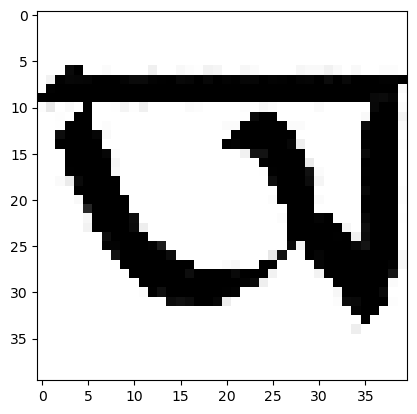

In [44]:
draw_n_guess_the_character()

1/1 [==============================] - 0s 21ms/step
prediction : ক


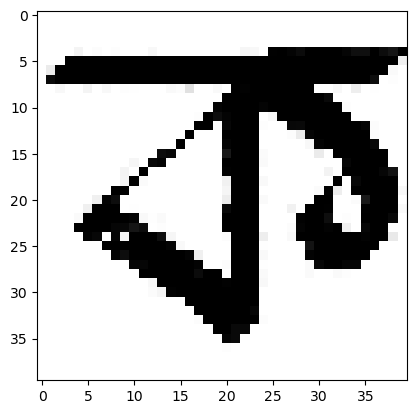

In [43]:
draw_n_guess_the_character()